<a href="https://colab.research.google.com/github/Alfred78w/AI_project/blob/main/DNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

Charger la base de données mnist de Keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Dimensions de x_train :", x_train.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de x_test  :", x_test.shape)
print("Dimensions de y_test  :", y_test.shape)

Dimensions de x_train : (60000, 28, 28)
Dimensions de y_train : (60000,)
Dimensions de x_test  : (10000, 28, 28)
Dimensions de y_test  : (10000,)


Normalisation of train data

In [ ]:
min_x_train = x_train.min()
max_x_train = x_train.max()

print("Min de x_train :", min_x_train)
print("Max de x_train :", max_x_train)

x_train_norm = (x_train-min_x_train)/(max_x_train-min_x_train)
x_test_norm = (x_test-min_x_train)/(max_x_train-min_x_train)

Min de x_train : 0
Max de x_train : 255


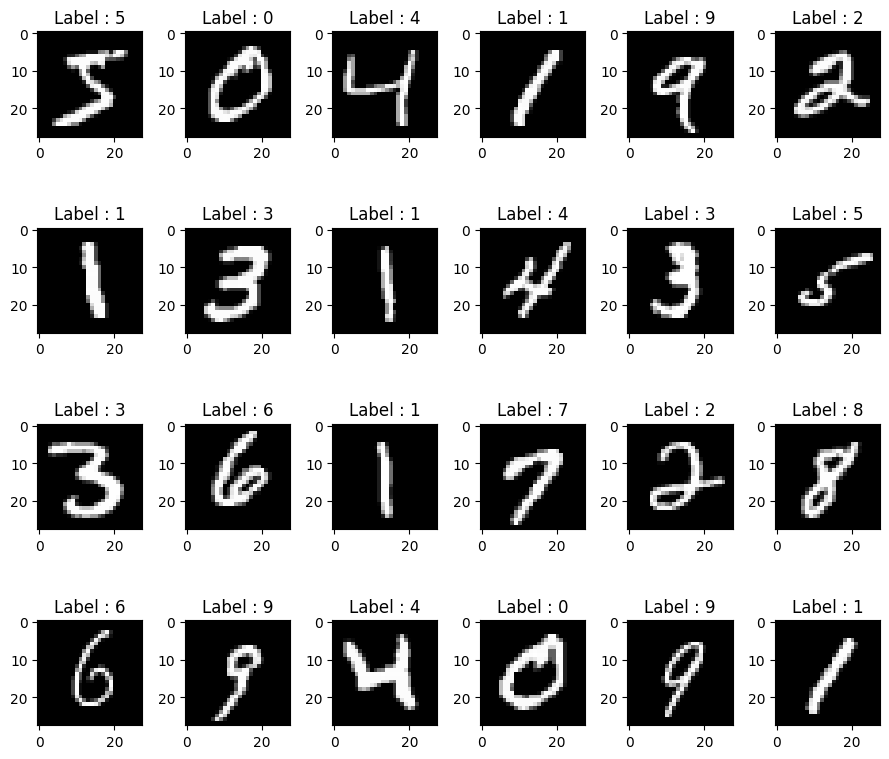

In [ ]:
num_row = 4
num_col = 6
num = num_row * num_col

images = x_train[:num]
labels = y_train[:num]

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label : {}'.format(labels[i]))
plt.tight_layout()
plt.show()

Structure(architecture) du modèle

In [ ]:
num_layer1 = 100
num_layer2 = 100

model = keras.Sequential([
    keras.layers.Input((28,28), name='Input_layer'),
    keras.layers.Flatten(),
    keras.layers.Dense(num_layer1, activation='relu', name='Hidden_layer1'),
    keras.layers.Dense(num_layer2, activation='relu', name='Hidden_layer2'),
    keras.layers.Dense(10, activation='softmax', name='Output_layer')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 Hidden_layer1 (Dense)       (None, 100)               78500     
                                                                 
 Hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


L'optimizer optimise les hyperparametres.
Loss est la fontion de perte. Ici, c'est l'entropie croisée.
Métrique est un critère d'évaluation.



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Full batch : apprentissage par lot complet

*   min batch :un epochs correspond à autant de mini lot qu'on pourrait choisi
*   online : apprentissage en ligne


1.   batch size : min batch
2.   List item





In [ ]:
hist = model.fit(x_train,
                 y_train,
                 batch_size=500,
                 epochs=20,
                 validation_split=0.2)

Epoch 1/20
96/96 [==============================] - 1s 7ms/step - loss: 6.5912 - accuracy: 0.7757 - val_loss: 1.6271 - val_accuracy: 0.8735
Epoch 2/20
96/96 [==============================] - 1s 6ms/step - loss: 1.1870 - accuracy: 0.8879 - val_loss: 1.0537 - val_accuracy: 0.8952
Epoch 3/20
96/96 [==============================] - 1s 6ms/step - loss: 0.6949 - accuracy: 0.9172 - val_loss: 0.8256 - val_accuracy: 0.9117
Epoch 4/20
96/96 [==============================] - 1s 5ms/step - loss: 0.4705 - accuracy: 0.9323 - val_loss: 0.7317 - val_accuracy: 0.9193
Epoch 5/20
96/96 [==============================] - 1s 8ms/step - loss: 0.3373 - accuracy: 0.9437 - val_loss: 0.6509 - val_accuracy: 0.9222
Epoch 6/20
96/96 [==============================] - 1s 8ms/step - loss: 0.2536 - accuracy: 0.9522 - val_loss: 0.5965 - val_accuracy: 0.9272
Epoch 7/20
96/96 [==============================] - 1s 7ms/step - loss: 0.1898 - accuracy: 0.9622 - val_loss: 0.5741 - val_accuracy: 0.9295
Epoch 8/20
96/96 [==

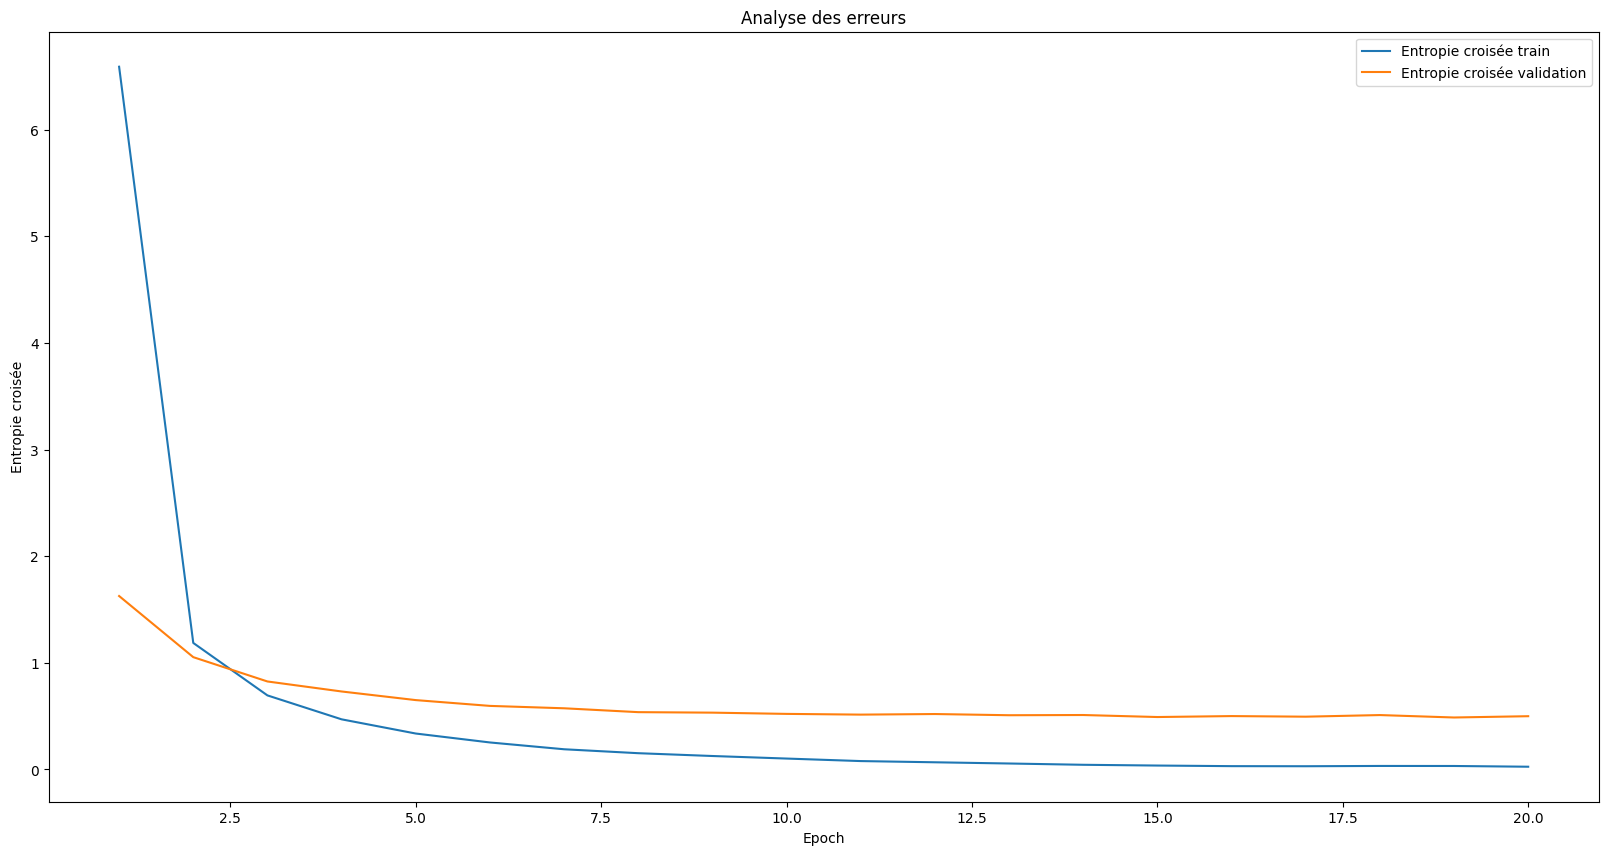

In [ ]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('Entropie croisée')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Entropie croisée train', 'Entropie croisée validation'])
plt.show()

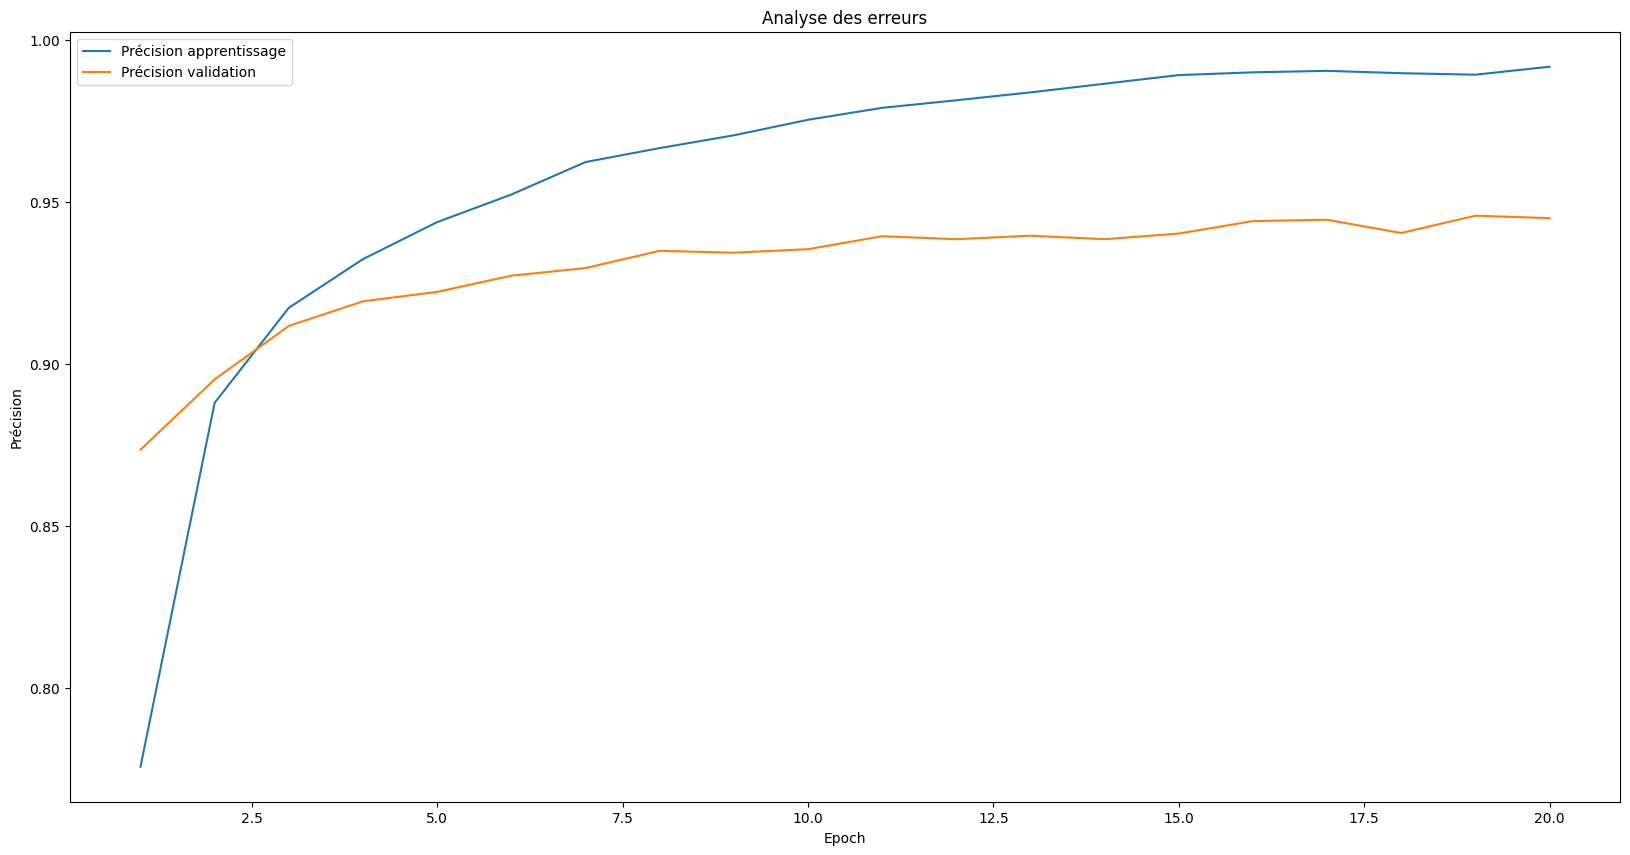

In [ ]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.plot(range(1, len(hist.history['accuracy']) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.history['val_accuracy']) + 1), hist.history['val_accuracy'])
plt.legend(['Précision apprentissage', 'Précision validation'])
plt.show()